## Lesson 4 

--> Seaborn  
--> Countplot  
--> Combining two columns using sns  
--> Boxplot  
--> Scatterplot  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Finding null values 

In [11]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [24]:
# Columns that have NaN Values 

# age -- We can store the median value for all the nulls 
# embarked --  By the graph we can use value 'S'
# deck -- By the graph we can use the value 'C'
# embark_town -- By the graph we can use the value Southampton

### Cleaning data

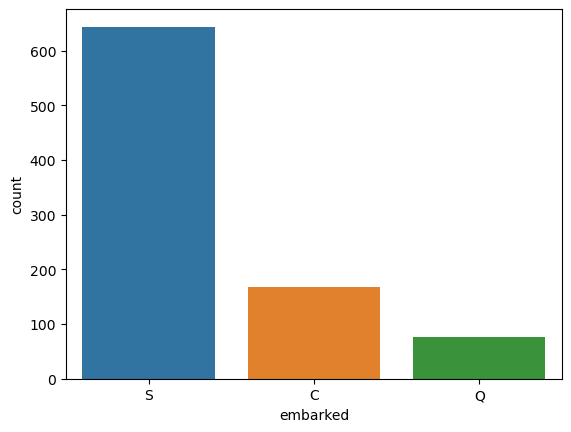

In [17]:
sns.countplot(x = 'embarked', data = data)  # Here we are using a countplot to check which value occured the most 
plt.show()

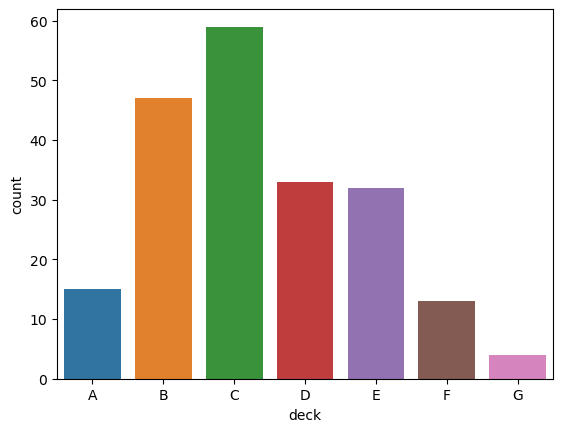

In [18]:
sns.countplot(x = 'deck', data = data) # Here we are checking which value in the deck column is repeated maximum number of times using countplot graph
plt.show()

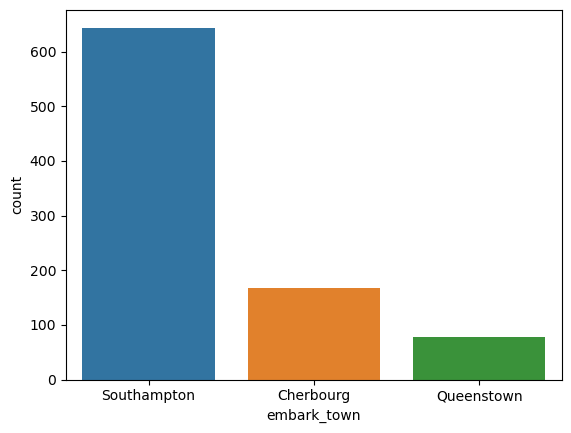

In [19]:
sns.countplot(x = 'embark_town', data = data) # We are checking which value in the embark_town column has been repeated maximum number of times 
plt.show()

In [22]:
age_median = data['age'].median()  # we are finding the median of the column age 
age_median

28.0

In [23]:
data['age'].fillna(age_median, inplace = True)  # we are filling the column 'age' with the age_median value 

In [25]:
data['embarked'].fillna('S',inplace = True)   # we are filling the column 'embarked' with the value 'S' value 

In [26]:
data['deck'].fillna('C', inplace = True) # we are filling the column 'deck' with the value 'C' value 

In [27]:
data['embark_town'].fillna('Southampton', inplace = True) # we are filling the column 'embark_town' with the value 'Southampton' value

In [28]:
data.isnull().sum()  # Checking for null values in all the columns

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Countplot

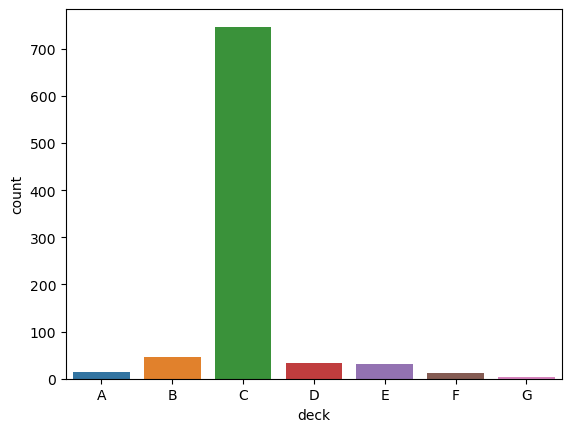

In [31]:
sns.countplot(x = 'deck', data = data) # Gives the count for the values present in the deck column
plt.show()

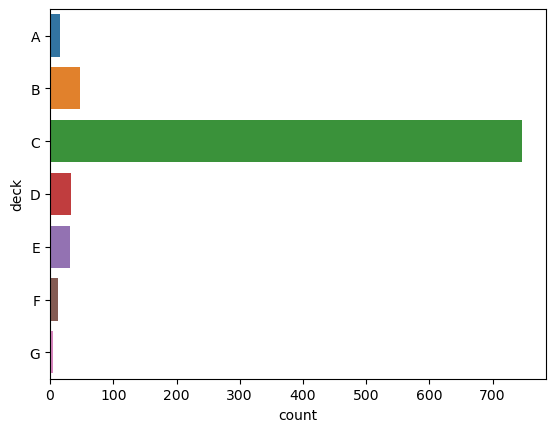

In [33]:
sns.countplot(y = 'deck', data = data)  # Gives the count for values present in the 'deck' column 
                                        # Since we have taken Y = 'deck' the graph is horizontal
plt.show()

### Combining two columns using sns

In [34]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


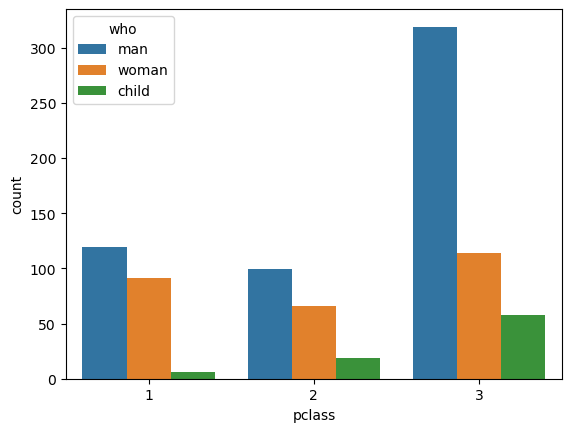

In [35]:
sns.countplot(x = 'pclass',hue = 'who', data= data)  # We are joining or using sub-class to plot a graph
                                                     # In the X-axis 'pclass' has values 3,2,1 and 
                                                     # In the Y axis 'who' has values man woman and child
                                                     # So our data will be plotted as how many man, woman and child are present in each pclass
plt.show()

### Boxplot

In [37]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


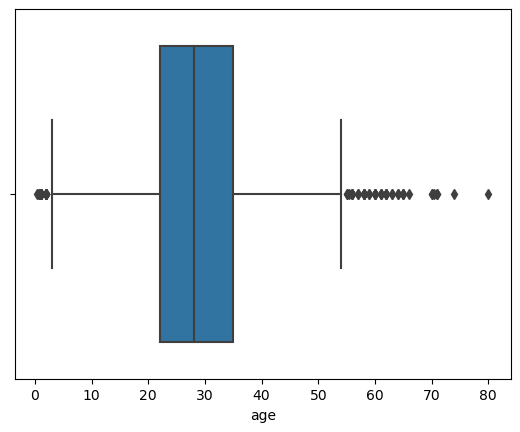

In [38]:
sns.boxplot(x = 'age', data = data)  # We are creating a blox plot graph using the 'age' column
plt.show()

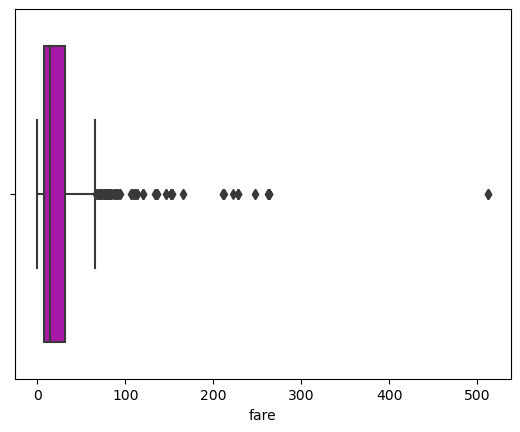

In [40]:
sns.boxplot(x='fare', color = 'm', data = data)  # We are creating a boxplot graph using the 'fare' column
plt.show()

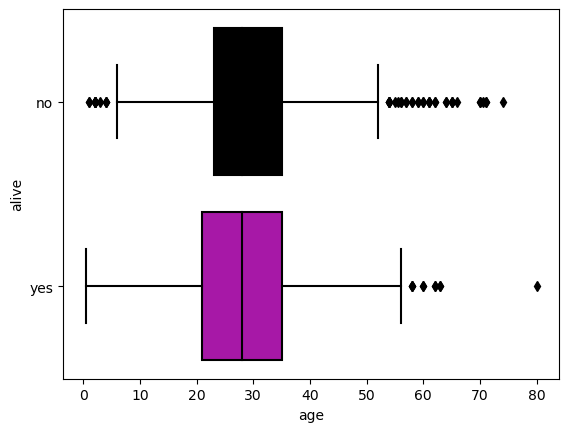

In [44]:
sns.boxplot(x = 'age', y = 'alive',palette = ['k','m'],data = data) # We are creating a boxplot where 
                                                                    # X axis consists of 'age' column
                                                                    # Y axis consits of 'alive' column
plt.show()

### Scatterplot

In [48]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


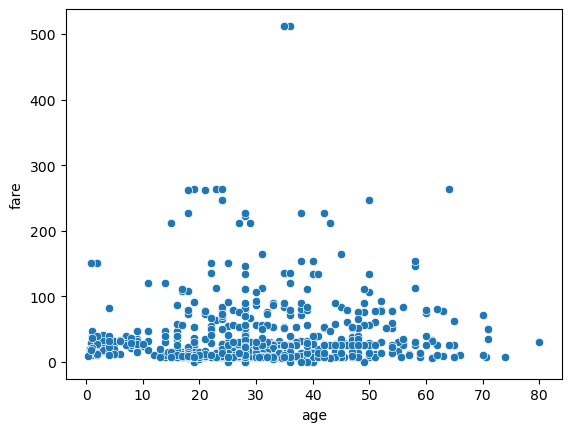

In [50]:
sns.scatterplot(x = 'age', y = 'fare', data = data) # We are creating a scatterplot with 
                                                    # X-axis having values of 'age' column and 
                                                    # Y-axis having values of 'fare' column
plt.show()

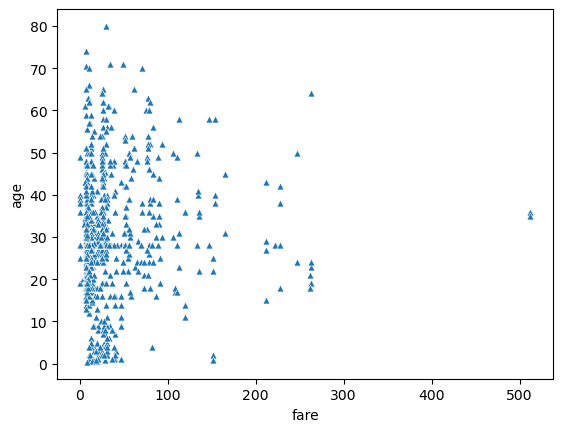

In [58]:
sns.scatterplot(x = 'fare', y ='age', s=25,marker = '^', data = data) # We are creating a scatterplot with
                                                                      # Where X-axis has values of 'fare' column
                                                                      # Y-axis has values of 'age' column
                                                                      # Marker size is set to 25 and marker used is triangle
plt.show()

In [59]:
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


<Axes: xlabel='alive', ylabel='embark_town'>

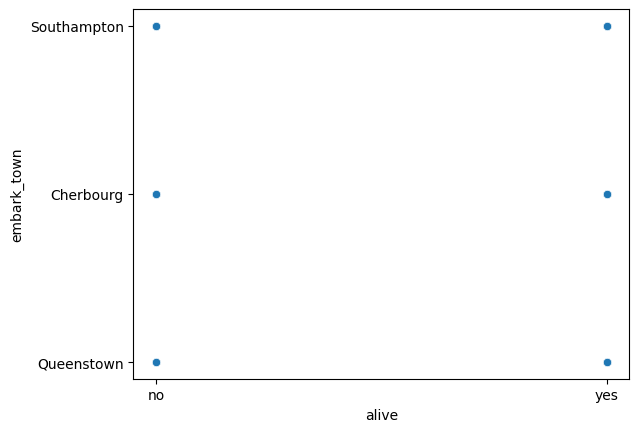

In [66]:
sns.scatterplot(x='alive',y='embark_town',data = data)  